# Data Understanding

In [5]:
import pandas as pd
from termcolor import cprint


data = pd.read_csv('data/data_nasabah.csv', delimiter=';')

cprint(f" Data (rows, columns): {data.shape}", "green") # Show the shape of the DataFrame (rows, columns)

cprint("\nInformation data types and encoding", "green") # Display data types and encoding scheme
print(data.info())

cprint("\nData descriptive statistics for numerical data :", "green") # Display descriptive statistics for numerical data
print(data.describe())

cprint("\nShow DataFrame", "green") # Display the first few rows of the DataFrame
print(data.head())

# Convert categorical columns to numerical encoding
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-Laki': 1, 'Perempuan': 2})
data['jenis_produk'] = data['jenis_produk'].map({'tabungan': 1, 'kartu_kredit': 2, 'deposito': 3})
data['pengguna_mobile_banking'] = data['pengguna_mobile_banking'].map({'YA':1, 'TIDAK': 2})
cprint(f"\nData setelah pengkodean kolom :", "green")
print(data.head())

# Display the number of unique values for each column
cprint("\nJumlah nilai unik untuk setiap kolom:", "green")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

Jumlah data (baris, kolom): (100, 10)

Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nasabah_id                 100 non-null    object
 1   umur                       100 non-null    int64 
 2   jenis_kelamin              100 non-null    object
 3   pendapatan                 100 non-null    int64 
 4   saldo_rata_rata            100 non-null    int64 
 5   jumlah_transaksi           100 non-null    int64 
 6   jenis_produk               100 non-null    object
 7   frekuensi_kunjungi_cabang  100 non-null    int64 
 8   pengguna_mobile_banking    100 non-null    object
 9   skor_kredit                100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB
None

Statistik deskriptif untuk data numerik:
             umur    pendapatan  saldo_rata_rata  jumlah_t

2. Exploring Data / Eksplorasi Data [Tahapan Menelaah Data]

Lima baris pertama dari data:
  nasabah_id  umur jenis_kelamin  pendapatan  saldo_rata_rata  \
0       N001    22     Perempuan     5800000          1508000   
1       N002    64     Perempuan     5700000          1254000   
2       N003    27     Perempuan     2950000           590000   
3       N004    34     Perempuan     3100000           186000   
4       N005    45     Laki-Laki     6700000          1474000   

   jumlah_transaksi  jenis_produk  frekuensi_kunjungi_cabang  \
0                19      tabungan                          1   
1                 9  kartu_kredit                          2   
2                12      tabungan                          1   
3                16      deposito                          5   
4                15  kartu_kredit                          3   

  pengguna_mobile_banking  skor_kredit  
0                   TIDAK          900  
1                   TIDAK          900  
2                      YA          500  
3                   TIDAK     

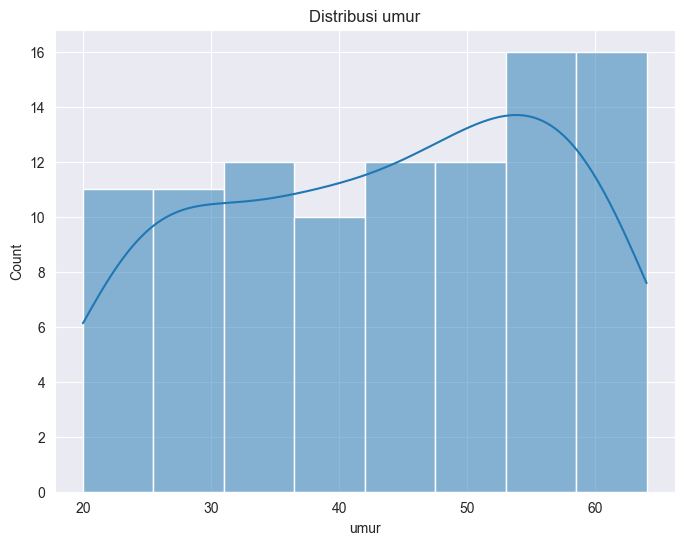

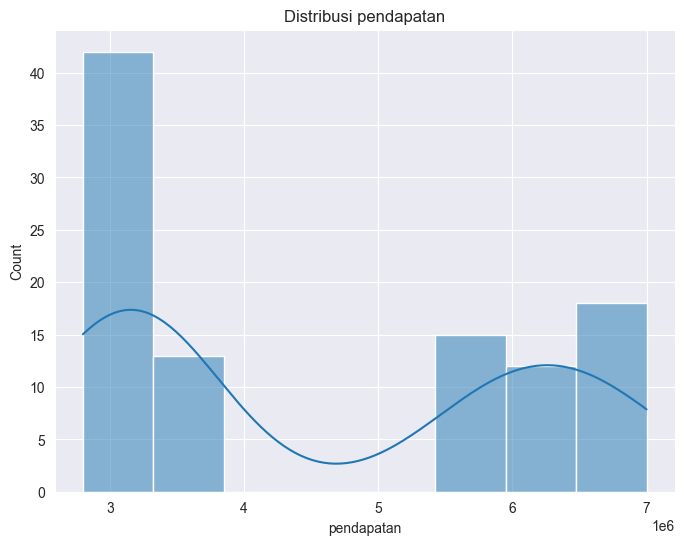

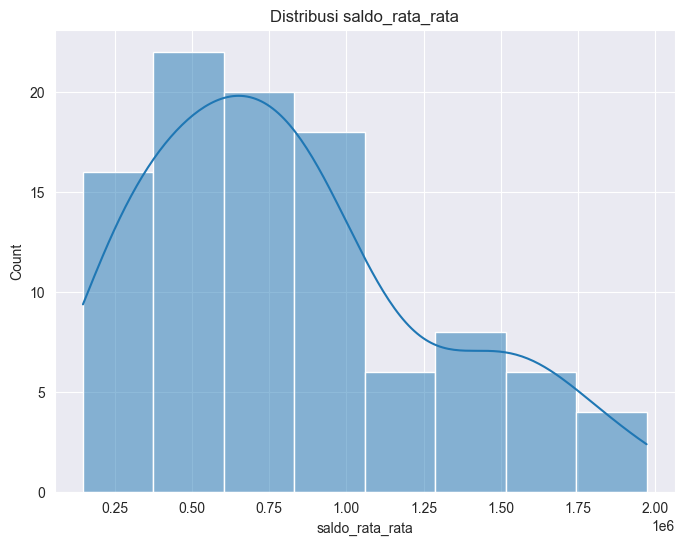

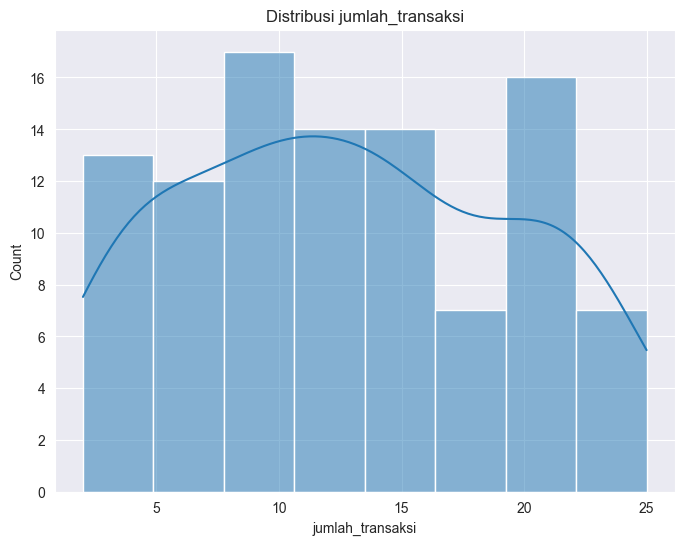

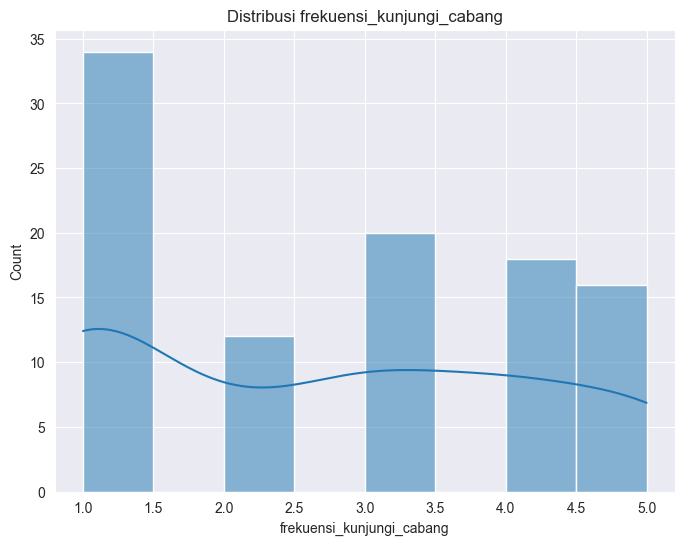

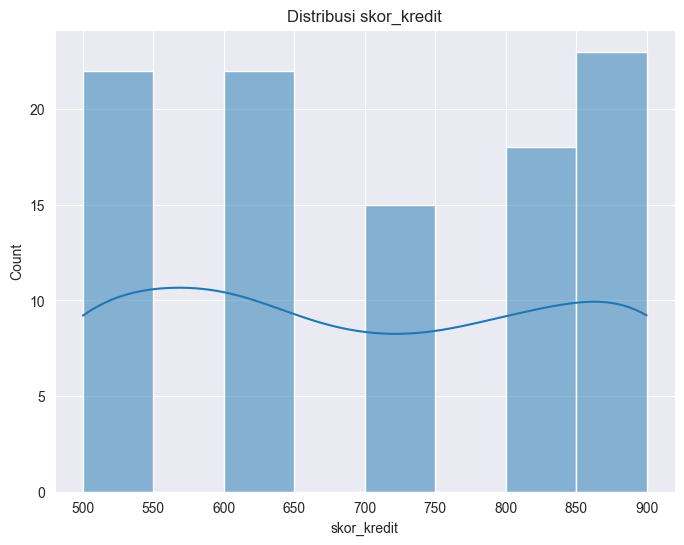


Analisis Korelasi Antara Variabel Numerik:

Analisis Data Kategorikal:


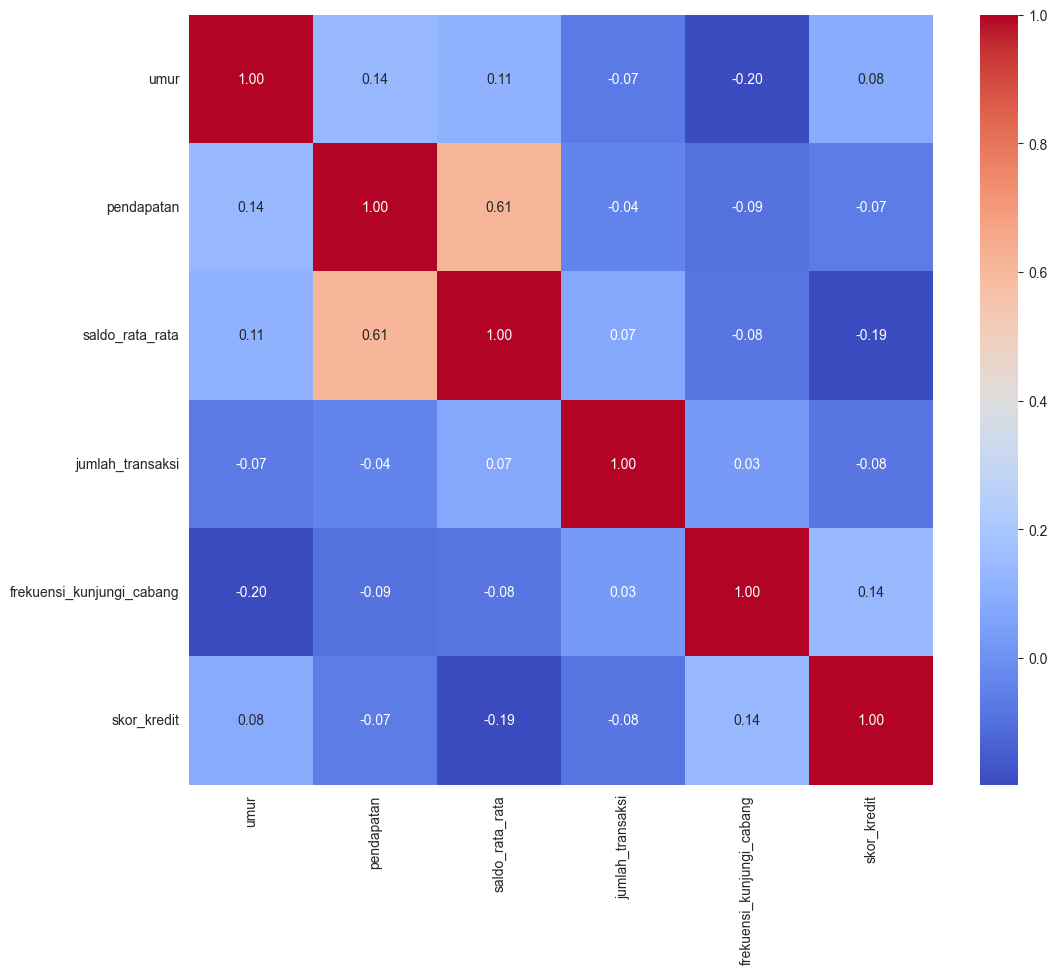

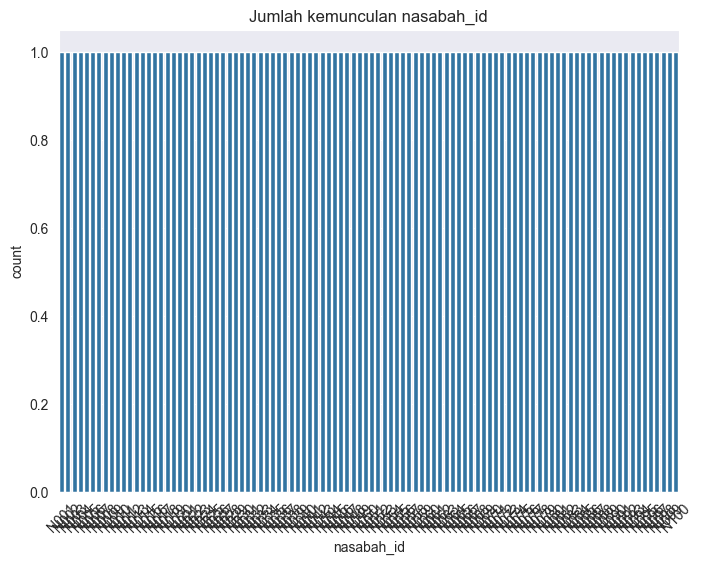

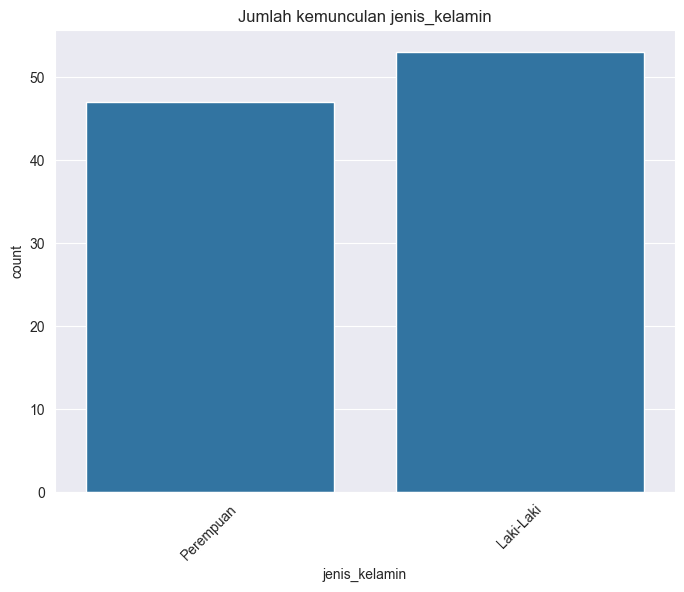

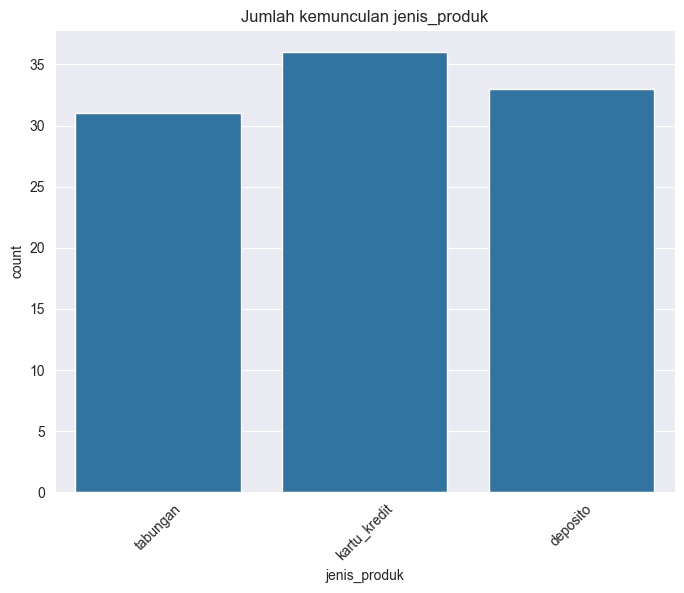

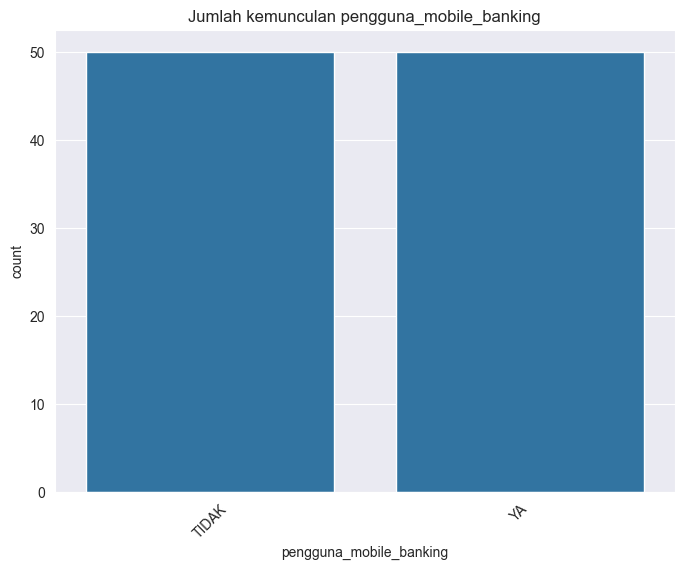


Analisis Nilai Hilang (Missing Values):

Jumlah Nilai Hilang Setiap Kolom:
nasabah_id                   0
umur                         0
jenis_kelamin                0
pendapatan                   0
saldo_rata_rata              0
jumlah_transaksi             0
jenis_produk                 0
frekuensi_kunjungi_cabang    0
pengguna_mobile_banking      0
skor_kredit                  0
dtype: int64

Analisis Outlier (Nilai Aneh):


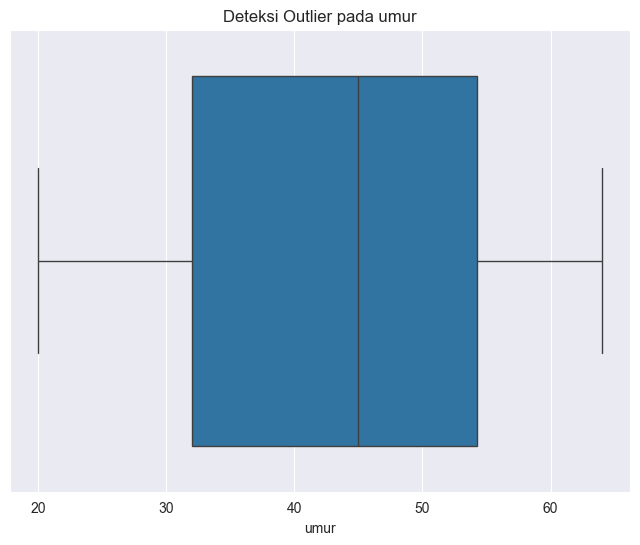

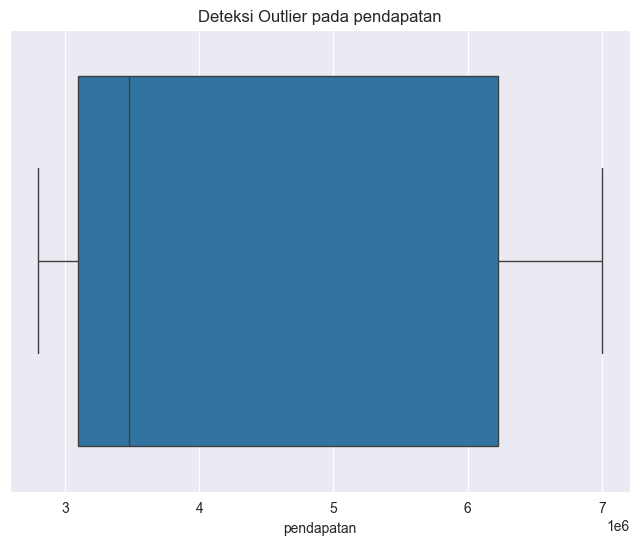

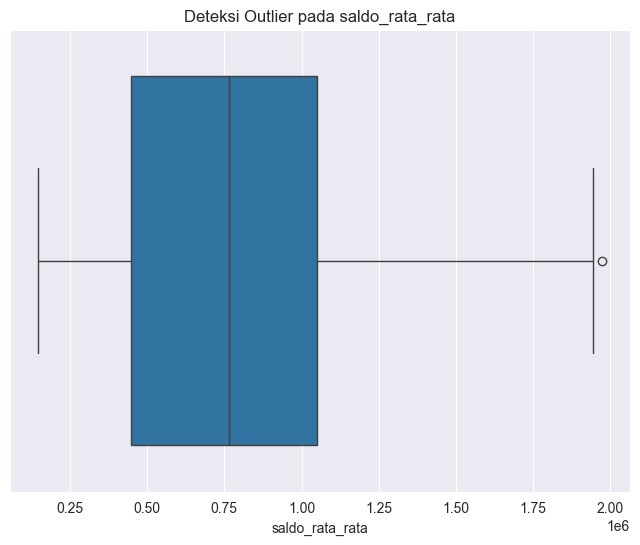

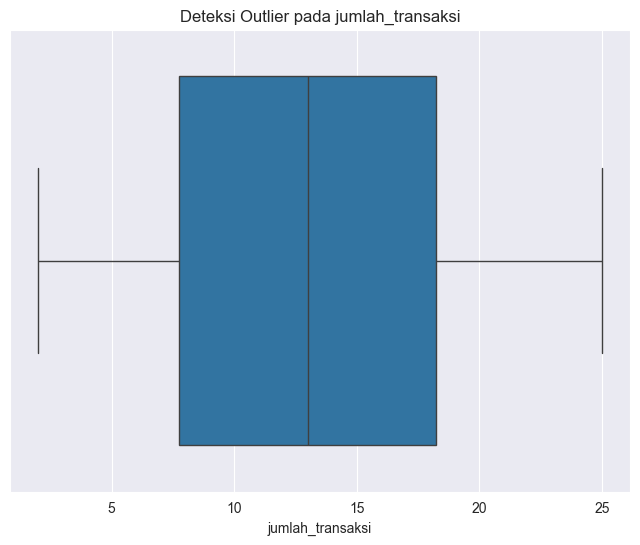

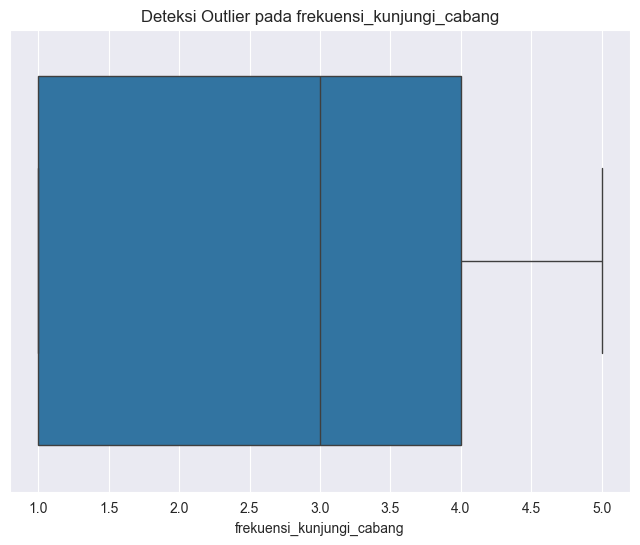

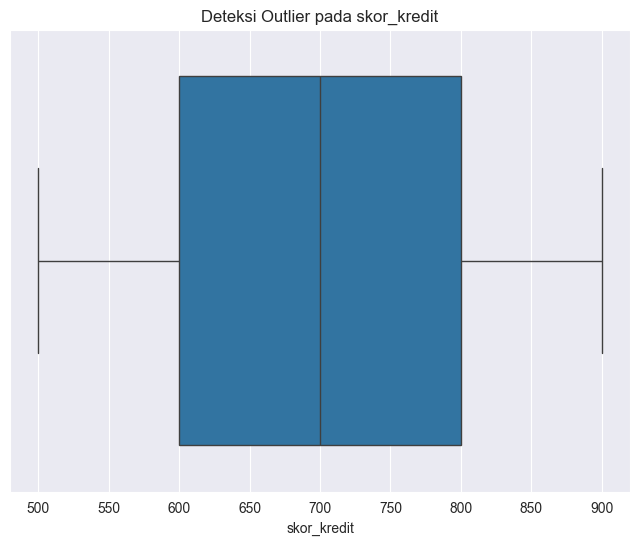


Menampilkan distribusi data untuk kolom tertentu (umur):


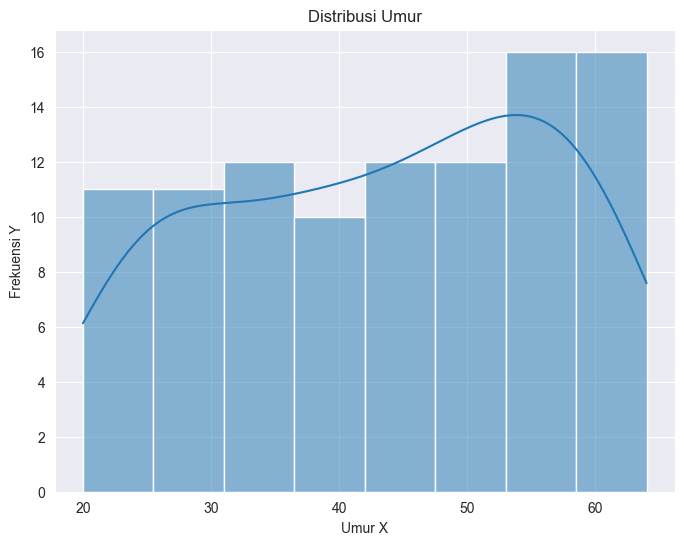


Analisis hubungan antara dua variabel numerik (umur dan Pendapatan):


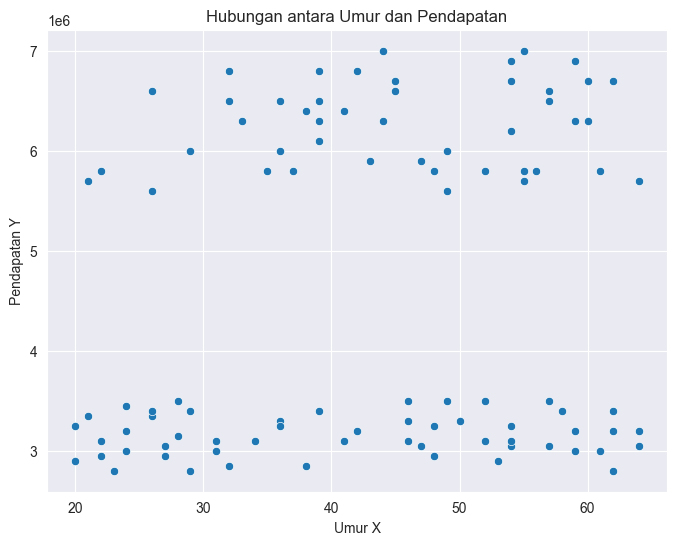


Menampilkan distribusi data untuk kolom Jenis Kelamin:


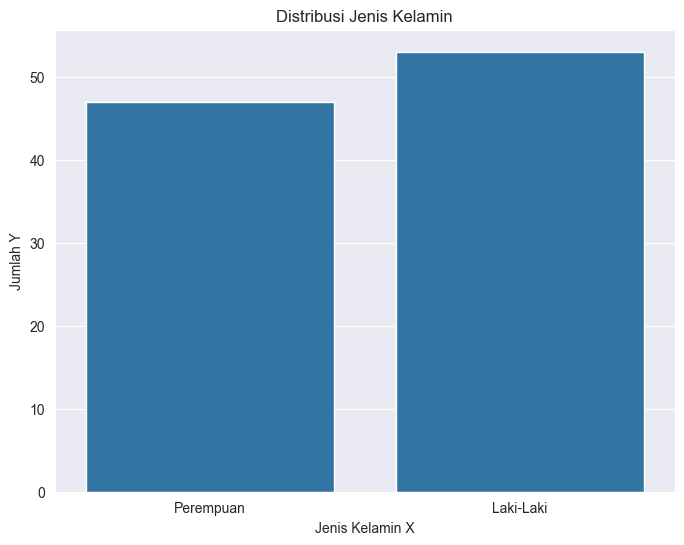


Menampilkan hubungan antara Jenis Kelamin dan Pendapatan:


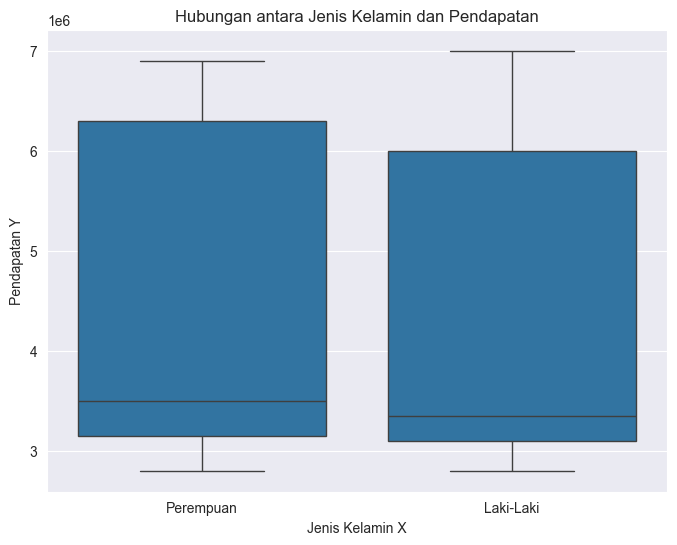

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/data_nasabah.csv', delimiter=';')
print(data.head())

cprint('\nInformasi tentang data:', 'green')
print(data.info())

cprint('\nStatistik deskriptif untuk data numerik:', 'green')
print(data.describe())

cprint('\nMenampilkan jumlah nilai unik untuk setiap kolom (Untuk memahami kategori)', 'green')
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

# Analysis Distribution of Numerical Data
cprint('\nAnalisis Distribusi Data Numerik:', 'green')
numerical_features = data.select_dtypes(include=['number'])
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

# Analysis Correlation Between Numerical Variables
cprint('\nAnalisis Korelasi Antara Variabel Numerik:', 'green')
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr() # Calculate correlation on numerical data only
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the correlation matrix
cprint('\nAnalisis Data Kategorikal:', 'green')
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Jumlah kemunculan {feature}")
    plt.xticks(rotation=45)
    plt.show()

# Analysis Missing Values
cprint('\nAnalisis Nilai Hilang (Missing Values):', 'green')
missing_value = data.isnull().sum()
print(f"\nJumlah Nilai Hilang Setiap Kolom:")
print(missing_value)

# Analysis Outliers (Nilai Aneh/ Anomali)
cprint('\nAnalisis Outlier (Nilai Aneh):', 'green')
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Deteksi Outlier pada {feature}")
    plt.show()

#  Displaying Distribution of Data for Specific Column (e.g., 'umur')
cprint('\nMenampilkan distribusi data untuk kolom tertentu (umur):', 'green')
plt.figure(figsize=(8, 6))
sns.histplot(data['umur'], kde=True)
plt.title("Distribusi Umur")
plt.xlabel("Umur X")
plt.ylabel("Frekuensi Y")
plt.show()

# Displaying Relationship Between Two Numerical Variables (e.g., 'umur' and 'pendapatan')
cprint('\nAnalisis hubungan antara dua variabel numerik (umur dan Pendapatan):', 'green')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umur', y='pendapatan', data=data)
plt.title('Hubungan antara Umur dan Pendapatan')
plt.xlabel('Umur X')
plt.ylabel('Pendapatan Y')
plt.show()

# Displaying Distribution of Data for Categorical Column (e.g., 'jenis_kelamin')
cprint('\nMenampilkan distribusi data untuk kolom Jenis Kelamin:', 'green')
plt.figure(figsize=(8, 6))
sns.countplot(x='jenis_kelamin', data=data)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin X')
plt.ylabel('Jumlah Y')
plt.show()

# Displaying Relationship Between Categorical and Numerical Variables (e.g., 'jenis_kelamin' and 'pendapatan')
cprint('\nMenampilkan hubungan antara Jenis Kelamin dan Pendapatan:', 'green')
plt.figure(figsize=(8, 6))
sns.boxplot(x='jenis_kelamin', y='pendapatan', data=data)
plt.title('Hubungan antara Jenis Kelamin dan Pendapatan')
plt.xlabel('Jenis Kelamin X')
plt.ylabel('Pendapatan Y')
plt.show()


3. Verifying Data Quality / Verifikasi Kualitas Data [Tahapan Memvalidasi Data]

In [21]:
# Validasi Data Mendalam dan Detail
# 1. Periksa konsistensi data
#   - Periksa apakah nilai dalam kolom tertentu sesuai dengan batasan yang diharapkan.
#   - Contoh: Periksa apakah kolom 'umur' hanya bernilai positif.

cprint(f"\nValidasi Umur:", "green")
if data['umur'].min() < 0:
    print(f"Terdapat nilai umur negatif perlu diperiksa lebih lanjut.")
else:
    print(f"Semua nilai umur valid (positif).")

#  - Periksa apakah kolom 'jenis_kelamin' hanya bersisi 'Laki-Laki' atau 'Perempuan'.
cprint(f"\nValidasi Jenis Kelamin:", "green")
invalid_gender = data['jenis_kelamin'].apply(lambda x: x not in ['Laki-Laki', 'Perempuan']).sum()
if invalid_gender:
    print(f"Terdapat {invalid_gender} nilai jenis kelamin yang tidak valid.")
else:
    print(f"Semua nilai jenis kelamin valid.")

# 2. Deteksi dan tangani duplikasi data
#  - Periksa apakah ada baris data yang duplikat dan hapus jika perlu.
cprint(f"\nDeteksi Duplikasi Data:", "green")
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    print(f"\nTerdapat {duplicate_rows} baris data duplikat.")
    # data.drop_duplicates()
else:
    print(f"Tidak ada baris data duplikat.")

# 3. Validasi rentang Data
#   - Periksa apakah nilai dalam kolom tertentu berada dalam rentang yang wajar.
#   Contoh: Periksa apakah kolom 'saldo_rata_rata' memiliki nilai yang realistis.
cprint(f"\nValidasi Rentang Saldo Rata-Rata:", "green")
if data['saldo_rata_rata'].max() > 1972000: # Ganti dengan batas atas yang sesuai
    print("Terdapat nilai saldo rata-rata yang tidak realistis, perlu diperiksa.")
else:
    print("Semua nilai saldo rata-rata berada dalam rentang yang wajar.")




Validasi Umur:
Semua nilai umur valid (positif).

Validasi Jenis Kelamin:
Semua nilai jenis kelamin valid.

Deteksi Duplikasi Data:
Tidak ada baris data duplikat.

Validasi Rentang Saldo Rata-Rata:
Semua nilai saldo rata-rata berada dalam rentang yang wajar.
